Testing a simple system class, seeing if it can deduce the system true and sensed states from a set of sensed component objects

In [1]:
# add location to path and complete necessary class imports
import sys
sys.path.append('..')

from shipClass.SensedComp import SensedComp
from shipClass.System import System

In [2]:
# create one high reliability component and two low-reliability ones
states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

high_rel_mat = [[1, 0, 0, 0], 
                [0.4, 0.6, 0, 0],
                [0.2, 0.2, 0.6, 0],
                [0.025, 0.025, 0.05, 0.9]]

low_rel_mat = [[1, 0, 0, 0], 
                [0.5, 0.5, 0, 0],
                [0.2, 0.3, 0.5, 0],
                [0.1, 0.1, 0.2, 0.6]]

# assuming all components will have a default sensor with the same states and matrix (good sensing capability)
sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.5, 0.5]]

# initialize three sensed components, one sensor attached to each component
# the sensor is the same for all three components, but they can be different if desired
sc1 = SensedComp(states, high_rel_mat, sensor_states, sensor_mat, 3, 'High Reliability Component')
sc2 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low Reliability Component 1')
sc3 = SensedComp(states, low_rel_mat, sensor_states, sensor_mat, 3, 'Low Reliability Component 2')

In [3]:
# create a system from the sensed components
sensed_components = [sc1, sc2, sc3]

sys = System('test_system', sensed_components)
sys.outputSystemStates()

Component  State Sensed State
Sensed High Reliability Component 3     3         
Sensed Low Reliability Component 1 3     3         
Sensed Low Reliability Component 2 3     3         
System State: 3


### Simulating a series system

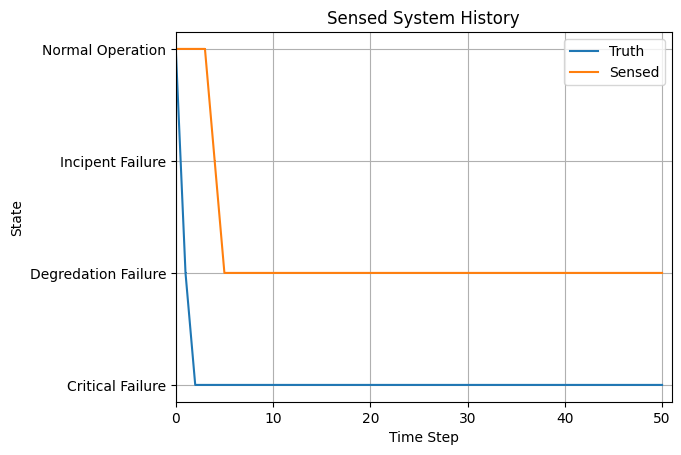

In [4]:
# steps = 10

# for i in range(steps):
#     sys.simulate(1)
#     print('Step: ', i)
#     sys.outputSystemStates()    
#     print('')
# sys.plotHistory()

sys.simulate(50)
sys.plotHistory()

# sys.reset()

In [7]:
# error checking on the components and attached sensors
print(f"sensed comp 1 history: {sc1.comp.history}")
for i in range(len(sc1.sensors)):
    print(f"sensed comp 1, sensor {i+1} history : {sc1.sensors[i].history}")
    print(f"sensed comp 1, sensor {i+1} sensed history : {sc1.sensors[i].sensorReadings}")    
print("")

print(f"sensed comp 1 history: {sc2.comp.history}")
for i in range(len(sc2.sensors)):
    print(f"sensed comp 2, sensor {i+1} history : {sc2.sensors[i].history}")
    print(f"sensed comp 1, sensor {i+1} sensed history : {sc2.sensors[i].sensorReadings}")    
print("")
    
print(f"sensed comp 1 history: {sc3.comp.history}")
for i in range(len(sc3.sensors)):
    print(f"sensed comp 3, sensor {i+1} history : {sc3.sensors[i].history}")
    print(f"sensed comp 1, sensor {i+1} sensing history : {sc3.sensors[i].sensorReadings}")    
print("")    
    

sensed comp 1 history: [3, 3, 3, 3, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensed comp 1, sensor 1 history : [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensed comp 1, sensor 1 sensed history : [3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
sensed comp 1, sensor 2 history : [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sensed comp 1, sensor 2 sensed history : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
sensed comp 1, sensor 3 history : [1, 1, 1, 0, 0, 0, 0, 0

In [ ]:
import pandas as pd

def export_simulation_history_to_excel(sensed_components, output_file='simulation_history.xlsx'):
    """
    Exports the simulation history of sensed components to an Excel file.

    Parameters:
        sensed_components (list): List of sensed components with simulation history.
        output_file (str): The name of the output Excel file.
    """
    # Initialize an empty list to store the data
    history_data = []

    # Iterate through each sensed component
    for idx, comp in enumerate(sensed_components):
        # Assuming each component has a method or attribute `get_history()` that returns its history
        if hasattr(comp, 'get_history') and callable(getattr(comp, 'get_history')):
            comp_history = comp.get_history()
            for entry in comp_history:
                # Append the component index and its history to the data list
                history_data.append({'Component Index': idx, **entry})
        else:
            print(f"Component at index {idx} does not have a 'get_history' method.")

    # Convert the history data to a DataFrame
    df = pd.DataFrame(history_data)

    # Write the DataFrame to an Excel file
    df.to_excel(output_file, index=False)
    print(f"Simulation history exported to {output_file}")
    
    

ModuleNotFoundError: No module named 'pandas'

In [6]:
from utils.helperFunctions import find_mode

ans = find_mode([3,2,0])
print(ans)

0


### Simulating a parallel system